In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt", "r").read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
chars = sorted(list(set("".join(words))))
stoi = {c: i for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i: c for c, i in stoi.items()}


In [16]:
# build the dataset

def build_dataset(words, block_size=3):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    return torch.tensor(X), torch.tensor(Y)


import random

random.seed(42)
random.shuffle(words)
n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

Xtrain, Ytrain = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

In [6]:
Xtrain.shape, Ytrain.shape  # 80% of the data

(torch.Size([182625, 3]), torch.Size([182625]))

In [67]:
n_embd = 10
n_hidden = 200
vocab_size = 27
block_size = 3

g = torch.Generator().manual_seed(42)
C = torch.randn([vocab_size, n_embd], generator=g)
W1 = torch.randn([n_embd * block_size, n_hidden], generator=g) * (5/3) / (n_embd * block_size) ** 0.5
# b1 = torch.randn([n_hidden], generator=g) * 0.01
W2 = torch.randn([n_hidden, vocab_size], generator=g) * 0.01
b2 = torch.randn([vocab_size], generator=g) * 0


bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))
bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

params = [C, W1, W2, b2, bngain, bnbias]
for p in params:
    p.requires_grad = True

tensor(-0.0153) tensor(0.9988)
tensor(-0.0086) tensor(3.0655)


(array([1.39114465e-05, 0.00000000e+00, 2.08671697e-05, 1.39114465e-05,
        2.08671697e-05, 5.56457858e-05, 1.04335848e-04, 9.04244020e-05,
        2.64317483e-04, 3.13007545e-04, 8.13819618e-04, 1.05726993e-03,
        2.10062841e-03, 3.58219746e-03, 5.75238311e-03, 9.22328900e-03,
        1.41827197e-02, 2.13123360e-02, 3.13564003e-02, 4.49061492e-02,
        6.24206602e-02, 8.27313721e-02, 1.04314981e-01, 1.20848735e-01,
        1.34412396e-01, 1.39316181e-01, 1.32012671e-01, 1.18762018e-01,
        9.98494069e-02, 7.80849490e-02, 6.03687219e-02, 4.19221439e-02,
        2.89636315e-02, 1.91560618e-02, 1.27915750e-02, 7.93648020e-03,
        5.06376651e-03, 2.79620074e-03, 1.74588653e-03, 8.97288296e-04,
        6.60793707e-04, 3.19963268e-04, 2.64317483e-04, 1.53025911e-04,
        8.34686787e-05, 2.08671697e-05, 3.47786161e-05, 1.39114465e-05,
        6.95572323e-06, 6.95572323e-06]),
 array([-18.26063919, -17.54180668, -16.82297417, -16.10414165,
        -15.38530914, -14.6664

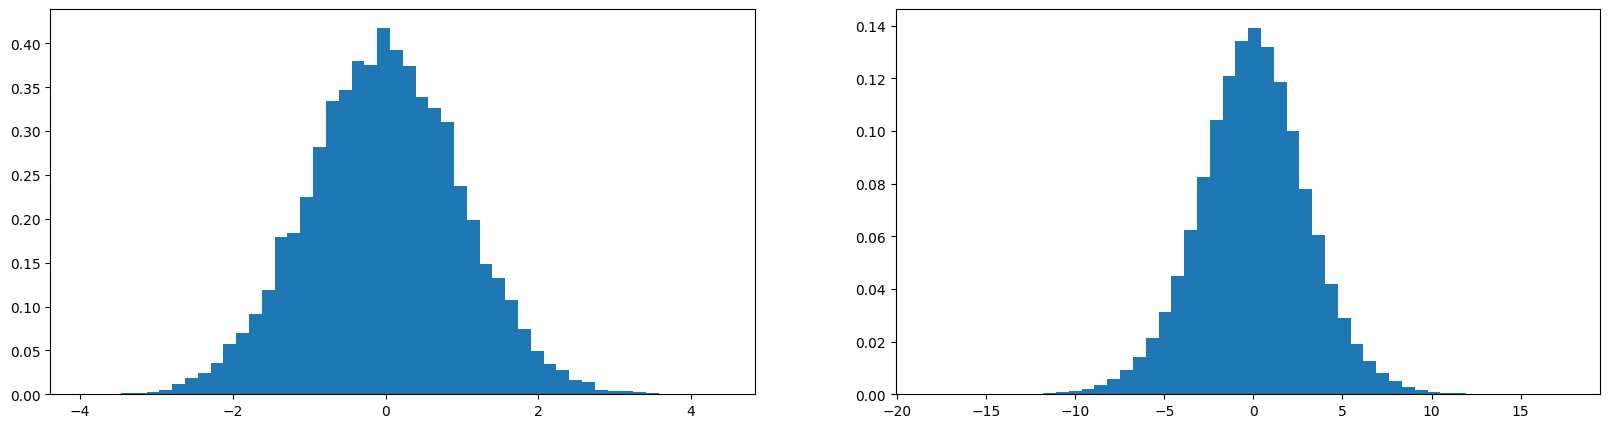

In [8]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) / 10 ** 0.5
y = x @ w
print(x.mean(), x.std())
print(y.mean(), y.std())
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x.view(-1).tolist(),50, density=True)
plt.subplot(122)
plt.hist(y.view(-1).tolist(),50, density=True)

In [9]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [68]:
lri = []
lossi = []
stepi = []
max_steps = 20000

for i in range(max_steps):

    # minibatch construct
    ix = torch.randint(0, Xtrain.shape[0], (32,), generator=g)
    Xb, Yb = Xtrain[ix], Ytrain[ix]

    # forward pass
    emb = C[Xb]
    hpreact = emb.view(emb.shape[0], -1) @ W1 
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.mean(0, keepdim=True)  
    hpreact = bngain * (hpreact - bnmeani) / bnstdi + bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = torch.nn.functional.cross_entropy(logits, Yb)
    # print(loss.item())
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

    # backward pass
    for p in params:
        p.grad = None
    loss.retain_grad()
    loss.backward()
    # update
    lr = 0.1 if i < 10000 else 0.01 
    for p in params:
        p.data += -lr * p.grad
    # lri.append(lr)
    if i % 1000 == 0:
        print(i, loss.item())
    lossi.append(loss.item())
    stepi.append(i)

0 3.300393581390381
1000 2.818566083908081
2000 2.7130813598632812
3000 2.7395453453063965
4000 2.2398953437805176
5000 2.1572048664093018
6000 2.6469104290008545
7000 2.195574998855591
8000 1.9594740867614746
9000 2.1209499835968018
10000 2.3477437496185303
11000 2.041003942489624
12000 2.448354959487915
13000 1.7924888134002686
14000 2.2293219566345215
15000 2.044398069381714
16000 2.467888832092285
17000 2.3104867935180664
18000 1.9645344018936157
19000 1.880371332168579


In [ ]:
plt.hist(h.view(-1).tolist(), 50)

In [ ]:
plt.hist(hpreact.view(-1).tolist(), 50)

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(h.abs() > 0.99, cmap='gray', interpolation='nearest')

In [ ]:
print(loss.item())

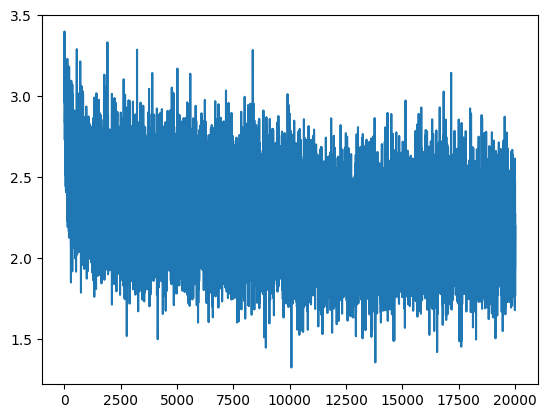

In [70]:
plt.plot(stepi, lossi)

In [69]:
@torch.no_grad() # no gradient computation
def split_loss(split):
    x, y = {
        'train': (Xtrain, Ytrain),
        'dev': (Xdev, Ydev),
        'test': (Xtest, Ytest)
    }[split]
    emb = C[x]
    hpreact = emb.view(emb.shape[0], -1) @ W1 
    hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = torch.nn.functional.cross_entropy(logits, y)
    print(split, loss.item())
split_loss('train')
split_loss('dev')

train 2.1272926330566406
dev 2.138402223587036


In [ ]:
plt.plot(lri, lossi)

In [ ]:
# training split , dev/validation split, test split
# 80% train, 10% dev, 10% test
plt.figure(figsize=(12, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=100)
for i in range(C.shape[0 - 1]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(23123123)
for _ in range(20):
    out = []
    context = [0] * 3
    while True:
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(-1, 6) @ W1)
        logits = h @ W2 + b2
        p = F.softmax(logits, dim=-1)
        ix = torch.multinomial(p, 1, generator=g).item()
        context = context[1:] + [ix]
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

In [ ]:
# 4-dim example of the issue
logits = torch.tensor([0.0, 0.0, 5.0, 0.0])
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss